In [1]:
import pandas as pd

In [2]:
url = "https://docs.google.com/spreadsheets/d/1vFWwNJ7-61O_QYaPo8d7bmw7K192az4R/export"
data = pd.read_excel(url, sheet_name=1)

In [3]:
#Obtengo las columnas que me interesan
data = data.iloc[:, -10:]
data.head()

,Somatización,Obsesión/com,Sen. Emocio.,Depresión,Ansiedad,Hostilidad,Ans. Fóbica,Ideación Paran.,Psicoticismo,Agotamiento
0,Alto,En riesgo,Promedio,Alto,Alto,Alto,Promedio,Promedio,Alto,Bajo
1,En riesgo,Alto,Promedio,En riesgo,Alto,Promedio,Alto,En riesgo,Promedio,Bajo
2,Promedio,Alto,Alto,Promedio,Promedio,Alto,Promedio,En riesgo,Promedio,Alto
3,En riesgo,En riesgo,En riesgo,En riesgo,En riesgo,En riesgo,Alto,En riesgo,Promedio,En riesgo
4,Alto,Promedio,En riesgo,En riesgo,Alto,Promedio,En riesgo,En riesgo,Promedio,Bajo


In [4]:
#Creo el map
category_map = {
    'Bajo': 0,
    'Promedio': 1,
    'Alto': 2,
    'En riesgo': 3
}

In [5]:
#Convierto las categorias a numeros
data2 = data.copy()
for i in range(10):
    data2.iloc[:, i ] = data2.iloc[:, i ].map(category_map)

data2.head()

,Somatización,Obsesión/com,Sen. Emocio.,Depresión,Ansiedad,Hostilidad,Ans. Fóbica,Ideación Paran.,Psicoticismo,Agotamiento
0,2,3,1,2,2,2,1,1,2,0
1,3,2,1,3,2,1,2,3,1,0
2,1,2,2,1,1,2,1,3,1,2
3,3,3,3,3,3,3,2,3,1,3
4,2,1,3,3,2,1,3,3,1,0


In [11]:
data2.to_csv("respuestas_label.csv")

In [6]:
#Importo Pycaret para clasificacion
from pycaret.classification import *

In [7]:
clf = setup(data2, target='Agotamiento', session_id=123, fold=4)

,Description,Value
0,Session id,123
1,Target,Agotamiento
2,Target type,Multiclass
3,Original data shape,"(372, 10)"
4,Transformed data shape,"(372, 32)"
5,Transformed train set shape,"(260, 32)"
6,Transformed test set shape,"(112, 32)"
7,Categorical features,9
8,Preprocess,True
9,Imputation type,simple


In [8]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [9]:
# init setup on exp
exp.setup(data2, target = 'Agotamiento', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Agotamiento
2,Target type,Multiclass
3,Original data shape,"(372, 10)"
4,Transformed data shape,"(372, 32)"
5,Transformed train set shape,"(260, 32)"
6,Transformed test set shape,"(112, 32)"
7,Categorical features,9
8,Preprocess,True
9,Imputation type,simple


In [10]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.5462,0.0000,0.5462,0.4694,0.5005,0.3640,0.3762,0.0475
lda,Linear Discriminant Analysis,0.5154,0.0000,0.5154,0.4805,0.4900,0.3238,0.3312,0.0500
lr,Logistic Regression,0.5115,0.0000,0.5115,0.4627,0.4808,0.3200,0.3267,0.5900
svm,SVM - Linear Kernel,0.4577,0.0000,0.4577,0.4442,0.4228,0.2545,0.2704,0.0450
lightgbm,Light Gradient Boosting Machine,0.4577,0.6601,0.4577,0.4380,0.4436,0.2501,0.2528,141.8000
nb,Naive Bayes,0.4462,0.6642,0.4462,0.4406,0.3939,0.1992,0.2194,0.0500
gbc,Gradient Boosting Classifier,0.4462,0.0000,0.4462,0.4228,0.4297,0.2320,0.2354,0.1725
knn,K Neighbors Classifier,0.4308,0.6407,0.4308,0.4147,0.4151,0.2116,0.2160,0.4500
rf,Random Forest Classifier,0.4308,0.6621,0.4308,0.4115,0.4136,0.2066,0.2117,0.1125
et,Extra Trees Classifier,0.4308,0.6551,0.4308,0.4160,0.4185,0.2108,0.2131,0.0975


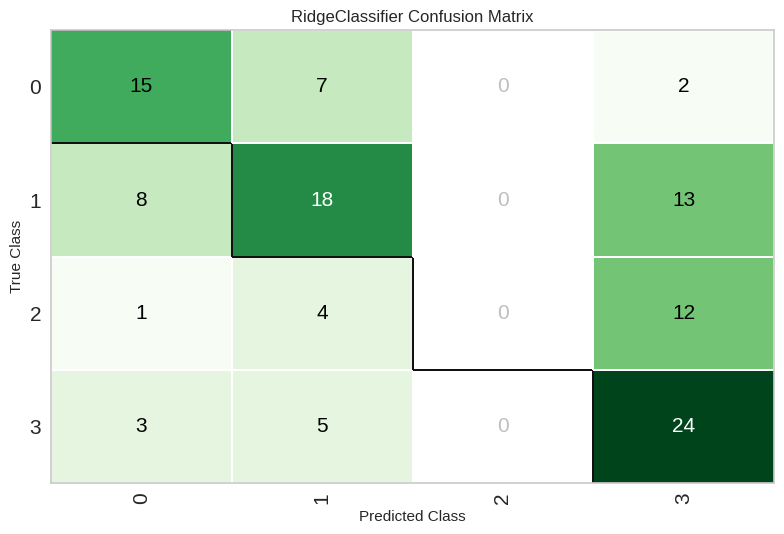

In [14]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

In [13]:
from pycaret.classification import save_model

# Guardar el modelo entrenado
save_model(best, 'modelo-SA45-ECE')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Somatización', 'Obsesión/com',
                                              'Sen. Emocio...
                                                               return_df=True,
                                                     